In [1]:
#Importando as bibliotecas
import pandas as pd
import urllib.request
import urllib.parse
import requests

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Declarando as variáveis Globais
url = 'http://servicodados.ibge.gov.br/api/v1/censos/nomes/basica'
df = pd.read_csv('/content/drive/MyDrive/Pibic/Projeto Predatismo (2022-2023)/ProjetoQualisProdutividade/datasets/AutoresV4/1A_novo.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   nome                   1037 non-null   object
 1   nome_citado            1037 non-null   object
 2   atual_instituicao      1026 non-null   object
 3   instituicao_doutorado  1037 non-null   object
 4   ano_doutorado          1037 non-null   int64 
 5   areas                  1025 non-null   object
 6   resumos_cv             1027 non-null   object
 7   nome_instituicao       678 non-null    object
 8   uf                     677 non-null    object
 9   artigos_periodicos     1037 non-null   object
 10  capitulos_livros       1037 non-null   object
dtypes: int64(1), object(10)
memory usage: 89.2+ KB


In [5]:
def get_gender(nome):
    name = nome
    args_f = {'nome':name, 'sexo':'f'}
    r_f = requests.get(url, args_f )

    args_m = {'nome':name, 'sexo':'m'}
    r_m = requests.get(url, args_m )

    if(r_m.text == '[]' and r_f.text =='[]'):
        sexo = 'indefinido'
    else:
        if(r_m.text != '[]' and r_f.text !='[]'):
            f = r_f.json()[0]['rank']
            m = r_m.json()[0]['rank']

            sexo = ''
            if(f< m):
                sexo = 'mulher'
            else:
                sexo = 'homem'
        if(r_m.text != '[]' and r_f.text =='[]'):
            sexo = 'homem'
        if(r_m.text == '[]' and r_f.text !='[]'):
             sexo = 'mulher'
    return sexo

In [6]:
for i, j in df.iterrows():
    nome = j['nome'].split()[0].lower()
    print(nome)

ado
everardo
iakov
ana
angela
cesar
sirio
pedro
nilo
márcio
fernando
sandra
antonio
álisson
ana
antonio
maurício
alberto
luiz
fabio
cursino
claudio
carola
dilce
antonio
roberto
antonio
carlos
marcio
afrânio
paulo
alexander
rosana
jacobus
martha
vera
flavio
eliana
celio
elliot
yan
segundo
joao
edson
denize
elina
kleber
luís
maurício
wagner
brenda
wilson
carlos
marcos
ronaldo
licinio
rogerio
fernando
amir
manoel
edson
jose
jose
nilo
alexander
jairo
josé
roberto
joão
maria
maria
antonio
elbert
joana
vitor
altair
joao
marcelo
margareth
denise
frida
carlos
marcelo
josé
sebastiao
luis
samuel
vanete
fabio
tsai
stefan
othon
joão
pedro
beatriz
maria
evandro
luiz
jose
edson
joão
marcos
bernardo
sidinei
odair
edgar
walter
alvaro
lucymara
rubens
lirio
marilene
carminda
claudia
marcelo
wilson
marcelo
claudio
hugo
luís
reinaldo
ricardo
antonio
maysa
mauro
jorge
marcelo
norberto
elaine
jorge
richard
rui
antonio
roberto
milton
maria
maria
maria
nildo
francisco
renato
alinka
miguel
ernesto
neusa
marco


In [7]:
for i, j in df.iterrows():
    nome = j['nome'].split()[0].lower()
    get_gender(nome)
    print(nome)
#    print(sexo)
df['genero'] = df['nome'].apply(get_gender)

ado


NameError: name 'sexo' is not defined

In [8]:
for i, j in df.iterrows():
    nome = j['nome'].split()[0].lower()
    sexo = get_gender(nome)
    print(nome)
    print(sexo)
    df.loc[i, 'genero'] = sexo
    df['genero'] = df['nome'].apply(get_gender)

ado
homem


KeyboardInterrupt: 

In [ ]:
df.head()

,nome,nome_citado,atual_instituicao,instituicao_doutorado,ano_doutorado,areas,resumos_cv,nome_instituicao,uf,artigos_periodicos,capitulos_livros
0,Ado Jorio de Vasconcelos,"JORIO, A.;Jorio, A.;Jorio, Ado;Jorio, A;Jório,...",Universidade Federal de Minas Gerais,Universidade Federal de Minas Gerais,1999,"Física da Matéria Condensada, Física da Matéri...",Professor Titular no Departamento de Física da...,Universidade Federal de Minas Gerais,MG,['Infrared study of the low-temperature phase ...,"['Fullerenes and Carbon Nanotubes', 'Unusual p..."
1,Everardo Valadares de Sa Barretto Sampaio,"Valadares de Sa Barretto Sampaio, Everardo;Sam...",Universidade Federal de Pernambuco,University of Georgia,1973,"Ciência do Solo, Fisiologia Vegetal, Fitogeogr...",Possui graduação em Agronomia pela Universidad...,NaN,NaN,['Dinâmica de Nutrientes Em Cana-De-Açúcar. I ...,['Fertilidade de solos do semi-árido do Nordes...
2,Iakov Veniaminovitch Kopelevitch,"KOPELEVICH YAKOV;Kopelevich, Y.;KOPELEVICH, Y;...",Universidade Estadual de Campinas,A. F. IOFFE PHYSICO-TECHNICAL INSTITUTE,1986,", Física da Matéria Condensada",Iakov Veniaminovitch Kopelevitch (Yakov Kopele...,Universidade Estadual de Campinas,SP,['Avalanchelike Magnetic Relaxation In The Pea...,['Mechanical and SQUID measurements on Nb thin...
3,Ana Paula Ribeiro Rodrigues,"RODRIGUES, Ana Paula Ribeiro;Rodrigues, Ana Pa...",Universidade Estadual do Ceará,Universidade Estadual do Ceará,2003,"Reprodução Animal, Reprodução Animal, Reproduç...",Possui graduação em Medicina Veterinária pela ...,Universidade Estadual do Ceará,CE,"['Foliculogênese em ruminantes domésticos', 'I...",['State of art of the manipulation of oocytes ...
4,Angela Maria Cavalcanti da Rocha,"ROCHA, A.;Rocha, Angela da;da Rocha, Angela;RO...",NaN,"IESE Business School, Universidad de Navarra",1982,"Administração de Empresas, Administração de Em...",Graduação em Economia pela Universidade Federa...,NaN,NaN,['Impacts of globalization in Latin America: i...,"['A magia dos casos', 'Wal-Mart e Lojas Americ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 12 columns):
nome                     1037 non-null object
nome_citado              1037 non-null object
atual_instituicao        1026 non-null object
instituicao_doutorado    1037 non-null object
ano_doutorado            1037 non-null int64
areas                    1025 non-null object
resumos_cv               1027 non-null object
nome_instituicao         678 non-null object
uf                       677 non-null object
artigos_periodicos       1037 non-null object
capitulos_livros         1037 non-null object
genero                   1037 non-null object
dtypes: int64(1), object(11)
memory usage: 97.3+ KB


In [ ]:
# Calcular a contagem de cada gênero
contagem_genero = df['genero'].value_counts()

# Calcular as porcentagens
porcentagens = contagem_genero / contagem_genero.sum() * 100

# Imprimir as porcentagens de cada gênero
print(porcentagens)

genero
homem         70.877531
mulher        26.904532
indefinido     2.217936
Name: count, dtype: float64


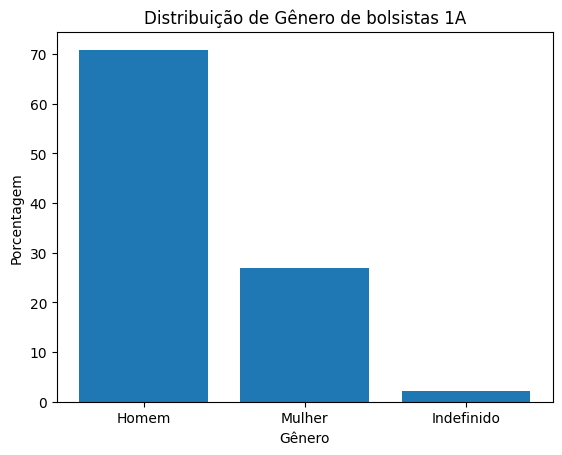

In [ ]:
import matplotlib.pyplot as plt

# Dados da distribuição de gênero
genero = ['Homem', 'Mulher', 'Indefinido']
count = [70.877531, 26.904532, 2.217936]

# Plotagem do gráfico de barras
plt.bar(genero, count)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Gênero')
plt.ylabel('Porcentagem')
plt.title('Distribuição de Gênero de bolsistas 1A')

# Exibindo o gráfico
plt.show()

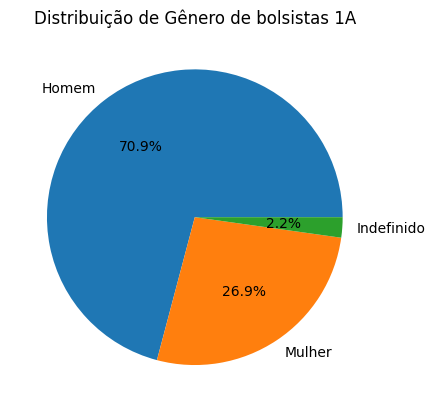

In [ ]:
import matplotlib.pyplot as plt

# Dados da distribuição de gênero
genero = ['Homem', 'Mulher', 'Indefinido']
count = [70.877531, 26.904532, 2.217936]

# Plotagem do gráfico de pizza
plt.pie(count, labels=genero, autopct='%1.1f%%')

# Adicionando título ao gráfico
plt.title('Distribuição de Gênero de bolsistas 1A')

# Exibindo o gráfico
plt.show()

In [ ]:
df2 = pd.read_csv('C:\\Users\\Matheus\\Downloads\\\\1B_novo.csv')
for i, j in df2.iterrows():
    nome = j['nome'].split()[0].lower()
    print(nome)

flávio
afranio
luiz
luciana
valdir
marcelo
humberto
vera
emerson
edivaldo
pedro
eduardo
suzete
augusto
joão
maria
leonardo
carolina
roberto
ricardo
jose
pascoal
marcelo
thiago
maria
fausto
ricardo
rômulo
volnei
juliana
inês
kathrin
simone
daniella
walmir
diná
joerg
sergio
elina
paulo
marco
jose
alberto
danielle
luiz
mauro
raimundo
eduardo
maria
mario
plamen
joão
dulce
cibele
mariza
maria
luiz
emanuel
nelson
evaldo
alexandre
fabio
ruben
rosangela
cristina
thiago
marcus
alejandro
daniela
jose
josé
frederic
fernando
roberto
tereza
adriana
elizeu
gladis
antonio
luiz
celia
luis
manuel
alessandro
cláudio
vera
aparecida
gustavo
gean
pablo
su
galba
luis
marta
darlei
leonor
virginia
paulo
adriana
anderson
renio
oswaldo
daniel
maurício
ednardo
eduardo
livio
mario
carlos
eliane
ênio
mauro
erotilde
maria
paulo
itania
maria
marco
fernando
zhou
sandra
josé
maria
katia
frederic
maristela
akemi
eduardo
luiz
renata
brett
carmen
marcio
sandro
anibal
saulo
josé
santuza
paulo
pedro
jonder
josé
lucielli
br

In [ ]:
df2.head()

,nome,nome_citado,atual_instituicao,instituicao_doutorado,ano_doutorado,areas,resumos_cv,nome_instituicao,uf,artigos_periodicos,capitulos_livros
0,Flávio dos Santos Gomes,"GOMES, F. S.;GOMES, Flávio;GOMES, FLAVIO",Universidade Federal do Rio de Janeiro,Universidade Estadual de Campinas,1997.0,"História do Brasil, Antropologia das Populaçõe...",Professor Associado da Universidade Federal do...,Universidade Federal do Rio de Janeiro,RJ,['NO MEIO DAS ÁGUAS TURVAS (RACISMO E CIDADANI...,"['Quilombos Oitocentistas no Rio de Janeiro', ..."
1,Afranio Lineu Kritski,"KRITSKI, A. L.;KRITSKI, AFRÂNIO LINEU;KRITSKI,...",Universidade Federal do Rio de Janeiro,Universidade Federal de São Paulo,1995.0,"Clínica Médica, Clínica Médica, Microbiologia ...",Possui graduação em Medicina pela Faculdade Ev...,Universidade Federal do Rio de Janeiro,RJ,['Immune Response During Hiv And Tuberculosis ...,"['Co-Infeccao Pelo M.Tuberculosis e Hiv', 'Tub..."
2,Luiz Carlos Pereira da Silva,"DA SILVA, L. C. P.;da Silva, L.C.P.;da Silva, ...",Universidade Estadual de Campinas,Universidade Estadual de Campinas,2001.0,"Sistemas Elétricos de Potência, Sistemas Elétr...",Possui graduação em Engenharia Elétrica pela U...,NaN,NaN,['Comparative Studies on Methods for Modeling ...,['Selection of Voltage Referential from the Po...
3,Luciana Venturini Rossoni,"ROSSONI, L. V.;Rossoni, L. V.;Rossoni, L.V.;Ro...",Universidade de São Paulo,Universidade Federal do Espírito Santo,2001.0,"Fisiologia de Órgãos e Sistemas, Fisiologia Va...",Possui graduação em Medicina pela Escola de Me...,NaN,NaN,['Hemodynamic and electrophysiological acute t...,"['Fármacos em Cardiologia', 'VASOMOTRICIDADE E..."
4,Valdir de Andrade Braga,"Braga, V.A.;Braga, Valdir A.;Braga, Valdir A;B...",Universidade Federal da Paraíba,Universidade de São Paulo,2006.0,"Biotecnologia Aplicada a Saúde, Fisiologia de ...",possui graduação em Medicina Veterinária pela ...,Universidade Federal da Paraíba,PB,['Comparison between coproparasitologic techni...,['Applications of Telemetry in Small Laborator...


In [ ]:
for i, j in df2.iterrows():
    nome = j['nome'].split()[0].lower()
    sexo = get_gender(nome)
    print(nome)
    print(sexo)
    df.loc[i, 'genero'] = sexo
    df['genero'] = df['nome'].apply(get_gender)

flávio
homem
afranio
homem
luiz
homem
luciana
mulher
valdir
homem
marcelo
homem
humberto
homem
vera
mulher
emerson
homem
edivaldo
homem
pedro
homem
eduardo
homem
suzete
mulher
augusto
homem
joão
homem
maria
mulher
leonardo
homem
carolina
mulher
roberto
homem


ConnectTimeout: HTTPConnectionPool(host='servicodados.ibge.gov.br', port=80): Max retries exceeded with url: /api/v1/censos/nomes/basica?nome=S%C3%ADlvia+Stanis%C3%A7uaski+Guterres&sexo=f (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x000001FD1B333D10>, 'Connection to servicodados.ibge.gov.br timed out. (connect timeout=None)'))

In [ ]:
genero = ['Homem', 'Mulher', 'Indefinido']
count = [70.877531, 26.904532, 2.217936]

# Plotagem do gráfico de barras
plt.bar(genero, count)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Gênero')
plt.ylabel('Porcentagem')
plt.title('Distribuição de Gênero de bolsistas 1A')

# Exibindo o gráfico
plt.show()